In [31]:
using Plots, MAT, DSP, FFTW

In [100]:
function upscale(vec, L)
    vec_up = []
    for sample in vec
        vec_local = zeros(L)
        vec_local[1] = sample
        append!(vec_up, vec_local)
        #vec_up.append(vec_local)
    end
    return vec_up
end

function find_max(vec)
    max_points = []
    for i in range(start=2, length=size(vec)[1]-2, step=1)
        amp = (vec[i])
        amp_prev = (vec[i-1])
        amp_next = (vec[i+1])
        if ((amp > amp_prev) && (amp > amp_next))
            append!(max_points, i)
        end
    end
    return max_points
end

find_max (generic function with 1 method)

Vector{Float64}

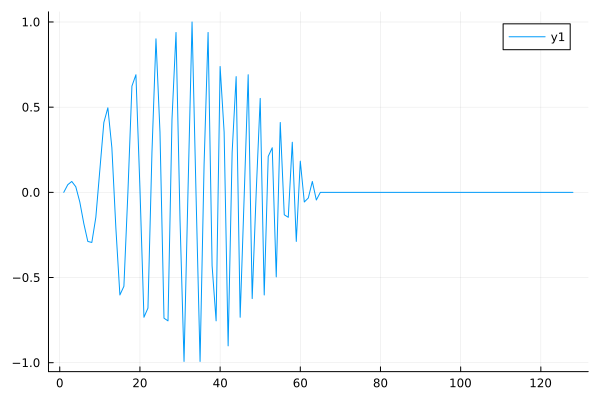

In [47]:
sig_m = matopen("sinal.mat")
sig = get(read(sig_m), "x", [])
Ta = get(read(sig_m), "Ta", [])
print(typeof(sig))
plot(sig)
#sig = get(read(sig_m), "x", [])

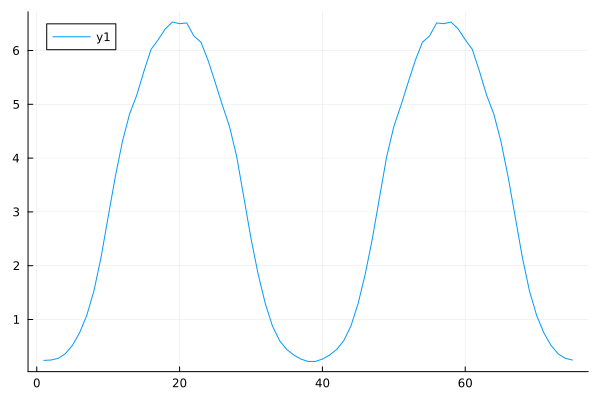

In [38]:
SFTD = fft(sig[1:75])
plot(abs.(SFTD))

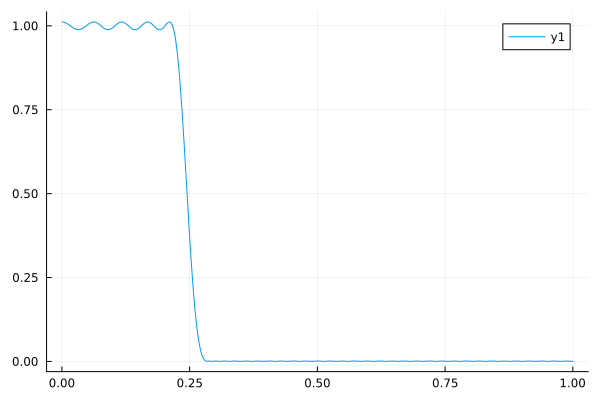

In [111]:
L = 4
sig_up = upscale(sig, L)


# Ω = 2π * 3.5kHz
# ω = Ω/fₐ = 0.875π
# Sinal se repete começando em 1.125π
# Com upscale 0.875π vai para 0.875/L π
# Com upscale 1.125π vai para 1.125/L π

δₚ = 0.01
δᵣ = 0.001
ωp = 0.875π / L
ωr = 1.125π / L

N = Int(round((-10*log10(δₚ*δᵣ) - 13) / (2.324*(ωr-ωp)) + 1))
h = remez(N, [(0, ωp/2π) => (1,1), (ωr/2π, 0.5) => (0, δₚ/δᵣ)], Hz=1)
w = range(0, stop=π, length=1000)
plot(w/π, (abs.(freqresp(PolynomialRatio(h, [1]), w))))



1.0
0.24531086705868418

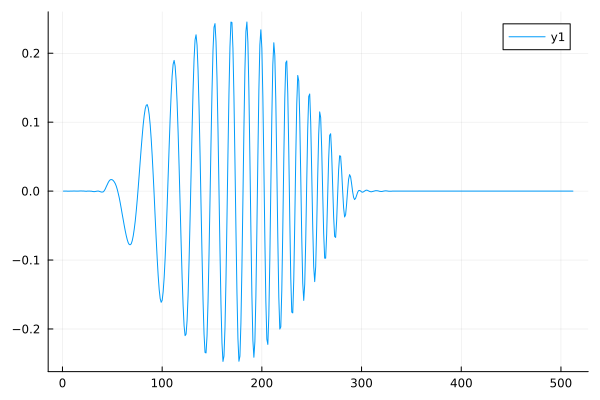

In [112]:
sig_filt = convert(Array{Float64, 1}, filt(PolynomialRatio(h, [1]), sig_up, zeros(N-1)))
println(maximum(sig))
print(maximum(sig_filt))
plot(sig_filt)

In [114]:
localmax = find_max(sig_filt)
vetor_filtrado = L * [x for x in sig_filt[localmax] if x > 0.01]


16-element Vector{Float64}:
 0.06708400065096654
 0.5019355823676012
 0.7583395944989141
 0.9070458079150415
 0.9718533025368189
 0.9809210862426658
 0.9812434682347367
 0.9360890838589893
 0.8608248292687977
 0.7555822651533092
 0.6710602175059325
 0.5636423464337793
 0.4597418702228155
 0.33300603585335586
 0.2052285433493644
 0.0955705395979489

A variável vetor_filtrado mostra os picos do sinal após a interpolação, ignorando picos com amplitude menor que 0.01 que surgiram devido ao ripple do filtro.

Como o sinal original também apresenta 16 picos visíveis, é razoável assumir que os maiores 16 picos do sinal interpolado correspondem aos picos do sinal original